In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pickle as serializer
import geopandas as gpd
from shapely.geometry import Point
import geopy.distance

In [2]:
gdf = gpd.read_file(r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\som_adm_ocha_itos_20230308_shp\som_admbnda_adm1_ocha_20230308.shp") 
# add NEIGHBORS column
gdf["NEIGHBORS"] = None  

for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].ADM1_EN.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.ADM1_EN != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = neighbors

# save GeoDataFrame as a new file
#gdf.to_file("./newfile1.shp")

In [3]:
# Get a list of all unique country names
countries = gdf['ADM1_EN'].unique()

# Create an empty adjacency matrix filled with zeros
adjacency_matrix = np.zeros((len(countries), len(countries)))

# Fill the adjacency matrix based on the neighbors column
for i, row in gdf.iterrows():
    country = row['ADM1_EN']
    neighbors = row['NEIGHBORS']
    country_index = np.where(countries == country)[0][0]
    neighbor_indices = [np.where(countries == neighbor)[0][0] for neighbor in neighbors]
    adjacency_matrix[country_index, neighbor_indices] = 1

# Convert the adjacency matrix to a dataframe with country names as row and column indices
adjacency_df = pd.DataFrame(adjacency_matrix, index=countries, columns=countries)

In [12]:
adjacency_df.to_csv('adj_som.csv', index=False)

In [5]:
gdf1 = gdf.to_crs(epsg=4326)

# Calculate the centroid
gdf['centroid'] = gdf.geometry.centroid

# Convert the centroid column to Well-Known Text (WKT)
gdf['centroid'] = gdf['centroid'].apply(lambda geom: geom.wkt)

gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

C:\Users\PcLaptop\AppData\Local\Temp\ipykernel_15520\2172441785.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
C:\Users\PcLaptop\AppData\Local\Temp\ipykernel_15520\2172441785.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
C:\Users\PcLaptop\AppData\Local\Temp\ipykernel_15520\2172441785.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


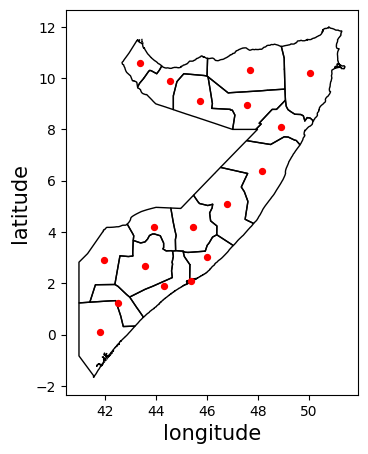

In [6]:
f, ax = plt.subplots(figsize=(10, 5))

# plot the shapefile
gdf.plot(ax=ax, facecolor='none', edgecolor='k')
plt.scatter(gdf['centroid_x'],gdf['centroid_y'], s=18,color='red')

ax.set_xlabel('longitude', fontsize=15)
ax.set_ylabel('latitude', fontsize=15)
plt.show()

In [7]:
distance_df = pd.DataFrame(index=gdf['ADM1_EN'], columns=gdf['ADM1_EN'])

# Iterate over the polygons
for i in range(len(gdf)):
    for j in range(i + 1, len(gdf)):
        
        distance = geopy.distance.geodesic((gdf.loc[i, 'centroid_x'],gdf.loc[i, 'centroid_y']),(gdf.loc[j, 'centroid_x'],gdf.loc[j, 'centroid_y'])).kilometers # Calculate the distance between the centroids
        #distance.meters
        distance_df.loc[gdf.loc[i, 'ADM1_EN'], gdf.loc[j, 'ADM1_EN']] = distance
        distance_df.loc[gdf.loc[j, 'ADM1_EN'], gdf.loc[i, 'ADM1_EN']] = distance
        
distance_df=distance_df.fillna(0)   
distance_df

ADM1_EN,Awdal,Bakool,Banadir,Bari,Bay,Galgaduud,Gedo,Hiraan,Lower Juba,Lower Shabelle,Middle Juba,Middle Shabelle,Mudug,Nugaal,Sanaag,Sool,Togdheer,Woqooyi Galbeed
ADM1_EN,,,,,,,,,,,,,,,,,,
Awdal,0.000000,517.218397,711.218429,742.268579,640.923618,572.573763,647.779719,557.628353,877.622654,704.772589,767.888304,665.735780,623.026648,644.204898,479.077647,482.231520,285.842059,142.406810
Bakool,517.218397,0.000000,230.459285,816.895990,132.307154,321.315006,243.673933,168.867628,412.725620,189.058684,288.603501,247.327023,496.059303,627.452326,629.170199,545.689072,434.529594,457.507691
Banadir,711.218429,230.459285,0.000000,800.859247,205.431474,280.467736,382.153544,166.209334,428.198798,117.533030,322.263281,102.187766,450.301150,602.608417,680.199108,581.253671,549.368317,620.835581
Bari,742.268579,816.895990,800.859247,0.000000,922.365372,525.166365,1059.760467,679.290707,1205.171808,894.879743,1083.283462,698.700816,350.906305,198.324664,263.233962,291.243375,487.812691,611.349610
Bay,640.923618,132.307154,205.431474,922.365372,0.000000,405.005883,177.231848,245.061573,287.515421,103.302763,163.016339,273.493275,585.777980,727.665054,751.140158,662.890375,565.184220,588.829360
Galgaduud,572.573763,321.315006,280.467736,525.166365,405.005883,0.000000,560.717080,160.405703,681.934687,369.723309,562.011929,180.629157,180.875755,327.339256,406.515437,305.492225,330.048651,446.206223
Gedo,647.779719,243.673933,382.153544,1059.760467,177.231848,560.717080,0.000000,401.896864,233.895467,272.246943,150.961183,448.135556,738.324347,871.116292,862.026788,784.007249,649.637227,634.425146
Hiraan,557.628353,168.867628,166.209334,679.290707,245.061573,160.405703,401.896864,0.000000,525.957400,222.465475,404.151854,109.874316,340.858891,483.338517,527.736747,432.597087,383.303369,458.229602
Lower Juba,877.622654,412.725620,428.198798,1205.171808,287.515421,681.934687,233.895467,525.957400,0.000000,316.563005,124.705721,524.096193,861.996502,1008.564967,1038.533550,950.264966,846.358294,851.927825


In [8]:
#distance_df.replace(" km", "")

In [13]:
distance_df.to_csv('dist_som.csv', index=False)

In [11]:
gdf.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,NEIGHBORS,centroid,centroid_x,centroid_y
0,5.657071,1.312224,Awdal,SO11,Somalia,SO,2022-12-21,2023-03-08,NaN,"MULTIPOLYGON (((43.46189 11.42429, 43.45532 11...",[Woqooyi Galbeed],POINT (43.376628406138195 10.574409778982194),43.376628,10.574410
1,6.650225,2.101389,Bakool,SO25,Somalia,SO,2022-12-21,2023-03-08,NaN,"POLYGON ((44.03028 4.95968, 44.08498 4.95730, ...","[Bay, Gedo, Hiraan, Lower Shabelle]",POINT (43.9525849783028 4.209421744758089),43.952585,4.209422
2,1.068762,0.026612,Banadir,SO22,Somalia,SO,2022-12-21,2023-03-08,NaN,"POLYGON ((45.55389 2.15350, 45.55328 2.15308, ...","[Lower Shabelle, Middle Shabelle]",POINT (45.37141230653466 2.0897848575227336),45.371412,2.089785
3,12.218762,5.618064,Bari,SO16,Somalia,SO,2022-12-21,2023-03-08,NaN,"POLYGON ((50.79877 11.98356, 50.80576 11.97939...","[Nugaal, Sanaag, Sool]",POINT (50.04934671559209 10.219175089969617),50.049347,10.219175
4,8.086913,3.572929,Bay,SO24,Somalia,SO,2022-12-21,2023-03-08,NaN,"POLYGON ((44.31110 3.57147, 44.31110 3.55957, ...","[Bakool, Gedo, Lower Shabelle, Middle Juba]",POINT (43.5674847069928 2.654694998984354),43.567485,2.654695
